<a href="https://colab.research.google.com/github/MikeRodziewicz/Udemy_ML_Bootcamp/blob/main/neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import plotly.express as px 
from plotly.subplots import make_subplots 
import plotly.graph_objects as go 


import tensorflow as tf 
from tensorflow.keras.datasets.mnist import load_data 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Dropout 

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.8.0


In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(X_train[0].shape)

(28, 28)


In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
print(X_train[0])

(-0.5, 27.5, 27.5, -0.5)

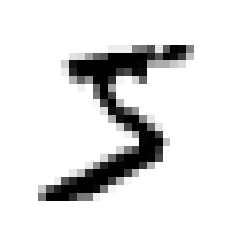

In [8]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

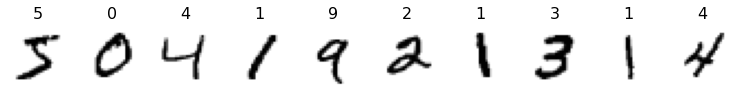

In [10]:
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()


In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3025 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1460 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1091 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0896 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0755 - accuracy: 0.9765


In [17]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0739 - accuracy: 0.9771 - 782ms/epoch - 2ms/step


[0.0738576203584671, 0.9771000146865845]

In [18]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.302472,0.913200
1,0.145998,0.957000
2,0.109117,0.967417
3,0.089594,0.971900
4,0.075476,0.976483


In [19]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)


In [20]:
model.predict(X_test)

array([[0.000000431146, 0.000000006444, 0.000007203643, ..., 0.9999262     , 0.000000194129, 0.000006525357],
       [0.000004575947, 0.00020438922 , 0.99913055    , ..., 0.000000000005, 0.000032920154, 0.000000000002],
       [0.000002565627, 0.9980205     , 0.0010942587  , ..., 0.00063519494 , 0.00020617494 , 0.000001495013],
       ...,
       [0.000000000133, 0.000000003473, 0.000000000527, ..., 0.00008409002 , 0.00019124121 , 0.00009768903 ],
       [0.000000088016, 0.000000002933, 0.000000000509, ..., 0.000000345386, 0.000062141175, 0.000000000203],
       [0.000000005177, 0.000000000002, 0.00000021201 , ..., 0.            , 0.000000000079, 0.000000000001]],
      dtype=float32)

In [23]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [25]:
misclass = pred[pred['y_test'] != pred['y_pred']]
misclass.index[:10]

Int64Index([8, 104, 151, 241, 247, 321, 340, 359, 381, 412], dtype='int64')

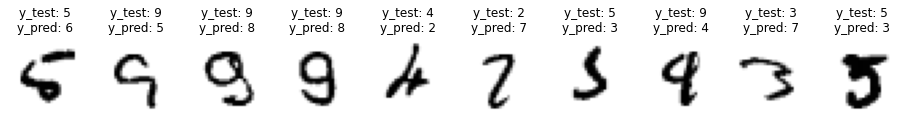

In [27]:
plt.figure(figsize=(16,16))
for i, j in zip(range(1,11), misclass.index[:10]):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='black', fontsize=12)
plt.show()